<a href="https://colab.research.google.com/github/huynguyen1999/FinalProject-P4DS/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 6:
1. 1712568 - Kim Đình Lộc - kimdinhloc
2. 1712502 - Trần Quang Huy - tranquanghuy12
3. 1712497 - Nguyễn Văn Huy - huynguyen12019
4. 1712496 - Nguyễn Trần Công Huy - huynguyen1999

Link thùng chứa Github của nhóm: https://github.com/huynguyen12019/KHDLUD-k18-nhom06-entity-embedding-rossmann

## Mô tả bài toán



Bài toán **Rossmann Store Sales** nhằm mục đích dự đoán doanh số bán hàng bằng cách sử dụng dữ liệu cửa hàng, khuyến mãi và đối thủ cạnh tranh.

**Link cuộc thi:** https://www.kaggle.com/c/rossmann-store-sales/overview

**Vấn đề:** Rossmann điều hành hơn 3.000 cửa hàng thuốc tại 7 quốc gia châu Âu. Hiện tại, những người quản lý cửa hàng Rossmann được giao nhiệm vụ dự đoán doanh số hàng ngày của họ trước tối đa 6 tuần. Doanh số bán hàng của cửa hàng bị ảnh hưởng bởi nhiều yếu tố, bao gồm khuyến mãi, cạnh tranh, ngày lễ của trường và tiểu bang, thời vụ và địa phương. Với hàng nghìn nhà quản lý cá nhân dự đoán doanh số bán hàng dựa trên các trường hợp đặc biệt của họ, độ chính xác của kết quả có thể khá khác nhau. Từ đó mà cuộc thi Rossmann Store Sales được hình thành trên Kaggle với hàng nghìn team tham gia để giải quyết bài toán.


## Giải quyết bài toán

Trong đồ án này, nhóm tìm hiểu và cài đặt lại phương pháp của nhóm **Neokami Inc** đạt hạng 3 trên Private Leaderboard.

**Github:** https://github.com/entron/entity-embedding-rossmann/tree/kaggle

**Mô tả:** Giải pháp của tác giả dựa trên việc ánh xạ các biến phân loại trong một bài toán xấp xỉ hàm vào các không gian Euclide - được gọi là thực thể nhúng (entity embeddings) của các biến phân loại.

* Entity Embeddings không chỉ làm giảm mức sử dụng bộ nhớ và tăng tốc mạng neural so với one-hot encoding, nhưng quan trọng hơn là bằng cách ánh xạ các giá trị tương tự nhau trong không gian nhúng, nó tiết lộ các thuộc tính nội tại của các biến phân loại.
* Các embedding thu được từ mạng neural có khả năng tăng hiệu suất của các phương pháp học máy khi được sử dụng làm các tính năng đầu vào thay thế.

### **1. Load dữ liệu**

#### Import libraries

In [ ]:
!pip install TensorFlow-gpu==1.15.0
!pip install Keras==1.2.2
!pip install pickle5
!pip install isoweek
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 3.8 MB 44.5 MB/s 
     |████████████████████████████████| 503 kB 18.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bf5267d4dbcee205f375de8a9554ac29e8c56928c03de470ddac5a7fecb70cfc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

In [ ]:
import os
import glob
import math
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from isoweek import Week
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras.layers.core import Merge
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
epsilon = 1e-6
%matplotlib inline

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
id = '1qGl8SS5Pgetb9MwDshIYwLRP8Ze_gJ_q' # file's id (change your file's id)
url = 'https://drive.google.com/u/1/uc?id={}&export=download'.format(id)
output = './data.zip'
gdown.download(url, output, quiet=False)
!unzip data.zip
os.remove('./data.zip')

Downloading...
From: https://drive.google.com/u/1/uc?id=1qGl8SS5Pgetb9MwDshIYwLRP8Ze_gJ_q&export=download
To: /content/data.zip
100%|██████████| 41.0M/41.0M [00:02<00:00, 16.1MB/s]


Archive:  data.zip
   creating: data/
  inflating: data/train.csv          
  inflating: data/store.csv          
   creating: data/weather/
  inflating: data/weather/BadenWuerttemberg.csv  
  inflating: data/weather/Berlin.csv  
  inflating: data/weather/Hamburg.csv  
  inflating: data/weather/Bayern.csv  
  inflating: data/weather/RheinlandPfalz.csv  
  inflating: data/weather/Saarland.csv  
  inflating: data/weather/NordrheinWestfalen.csv  
  inflating: data/weather/Brandenburg.csv  
  inflating: data/weather/Hessen.csv  
  inflating: data/weather/SchleswigHolstein.csv  
  inflating: data/weather/SachsenAnhalt.csv  
  inflating: data/weather/MecklenburgVorpommern.csv  
  inflating: data/weather/Niedersachsen.csv  
  inflating: data/weather/Bremen.csv  
  inflating: data/weather/Thueringen.csv  
  inflating: data/weather/Sachsen.csv  
  inflating: data/store_states.csv   
   creating: data/.ipynb_checkpoints/
  inflating: data/test.csv           
   creating: data/googletrend/
  infl

#### Read files

In [ ]:
data_path = './data/'
train_path = data_path + 'train.csv'
test_path = data_path + 'test.csv'
store_path = data_path + 'store.csv'
store_states_path = data_path + 'store_states.csv'
google_trend_path = data_path + 'googletrend/'
weather_path = data_path + 'weather/'

##### Train data

In [ ]:
train_df = pd.read_csv(train_path, parse_dates=['Date'], low_memory=False)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


##### Test data

In [ ]:
test_df = pd.read_csv(test_path, parse_dates=['Date'], low_memory=False)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [ ]:
test_df.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


##### Store data

In [ ]:
store_df = pd.read_csv(store_path)
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


##### Store states data

In [ ]:
store_states_df = pd.read_csv(store_states_path)
store_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   1115 non-null   int64 
 1   State   1115 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


In [ ]:
store_states_df.head(2)

,Store,State
0,1,HE
1,2,TH


##### Weather data

In [ ]:
#@title State => Code
def to_state_name_code(state_name):
    d = {}
    d['BadenWuerttemberg'] = 'BW'
    d['Bayern'] = 'BY'
    d['Berlin'] = 'BE'
    d['Brandenburg'] = 'BB'
    d['Bremen'] = 'HB'
    d['Hamburg'] = 'HH'
    d['Hessen'] = 'HE'
    d['MecklenburgVorpommern'] = 'MV'
    d['Niedersachsen'] = 'HB,NI'
    d['NordrheinWestfalen'] = 'NW'
    d['RheinlandPfalz'] = 'RP'
    d['Saarland'] = 'SL'
    d['Sachsen'] = 'SN'
    d['SachsenAnhalt'] = 'ST'
    d['SchleswigHolstein'] = 'SH'
    d['Thueringen'] = 'TH'
    return d[state_name]

In [ ]:
german_states_weather = glob.glob(weather_path + '/*.csv')
german_weather_df = []
for state_weather in german_states_weather:
  state_name = os.path.splitext(os.path.basename(state_weather))[0]
  state_code = to_state_name_code(state_name)
  state_weather_df = pd.read_csv(state_weather, parse_dates=['Date'], delimiter=';', low_memory=False)
  state_weather_df['State'] = state_code
  # temperatures = ['Max_TemperatureC','Mean_TemperatureC','Min_TemperatureC']
  # humidities = ['Max_Humidity','Mean_Humidity','Min_Humidity']
  # wind_speeds = ['Max_Wind_SpeedKm_h','Mean_Wind_SpeedKm_h']
  # state_weather_df[temperatures] =  (state_weather_df[temperatures] - 10) / 30
  # state_weather_df[humidities] =  (state_weather_df[humidities] - 50) / 50
  # state_weather_df[wind_speeds] = ( state_weather_df[wind_speeds] - 10) / 40
  german_weather_df.append(state_weather_df)
german_weather_df = pd.concat(german_weather_df).reset_index(drop=True)
german_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        15840 non-null  datetime64[ns]
 1   Max_TemperatureC            15840 non-null  int64         
 2   Mean_TemperatureC           15840 non-null  int64         
 3   Min_TemperatureC            15840 non-null  int64         
 4   Dew_PointC                  15840 non-null  int64         
 5   MeanDew_PointC              15840 non-null  int64         
 6   Min_DewpointC               15840 non-null  int64         
 7   Max_Humidity                15840 non-null  int64         
 8   Mean_Humidity               15840 non-null  int64         
 9   Min_Humidity                15840 non-null  int64         
 10  Max_Sea_Level_PressurehPa   15840 non-null  int64         
 11  Mean_Sea_Level_PressurehPa  15840 non-null  int64     

In [ ]:
german_weather_df.head(2)

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,State
0,2013-01-01,8,6,4,7,6,2,100,90,77,1008,1001,998,31.0,11.0,6.0,29,23,NaN,6.10,6.0,Rain,235,HB
1,2013-01-02,7,5,3,5,4,3,93,88,81,1023,1017,1008,31.0,14.0,9.0,27,21,NaN,0.51,6.0,Rain,244,HB


##### Google trend

In [ ]:
google_trend_files = glob.glob(google_trend_path + '/*.csv')
german_states_ggtrend_df = []
german_ggtrend_df = None
for state_trend in google_trend_files:
  state_name = os.path.splitext(os.path.basename(state_trend))[0]
  state_code = state_name[-2:]
  if state_code == 'NI':
    state_code = 'HB,NI'
  
  state_ggtrend_df = pd.read_csv(state_trend)
  
  state_ggtrend_df['State'] = state_code
  dt = pd.to_datetime(state_ggtrend_df.iloc[:, 0].apply(lambda x: x.split(' - ')[1]))
  state_ggtrend_df['Year'] = dt.dt.year
  state_ggtrend_df['WeekOfYear'] = dt.apply(lambda x: x.isocalendar()[1])
  state_ggtrend_df['StateTrend'] = state_ggtrend_df.iloc[:, 1]/100
  state_ggtrend_df.drop(columns=state_ggtrend_df.columns[:2], inplace=True)
  if state_code == 'DE':
    german_ggtrend_df = state_ggtrend_df
    german_ggtrend_df.drop(columns=['State'], inplace=True)
    german_ggtrend_df.rename(columns={'StateTrend':'GermanTrend'}, inplace=True)
    continue
  german_states_ggtrend_df.append(state_ggtrend_df)
german_states_ggtrend_df = pd.concat(german_states_ggtrend_df).reset_index(drop=True)
german_states_ggtrend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1924 non-null   object 
 1   Year        1924 non-null   int64  
 2   WeekOfYear  1924 non-null   int64  
 3   StateTrend  1924 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 60.2+ KB


In [ ]:
german_states_ggtrend_df.head(2)

,State,Year,WeekOfYear,StateTrend
0,BY,2012,49,0.73
1,BY,2012,50,0.67


In [ ]:
german_ggtrend_df.head(2)

,Year,WeekOfYear,GermanTrend
0,2012,49,0.77
1,2012,50,0.76


### **2. Preprocess**

#### Insert `Day`, `Month`, `Year`, `WeekOfYear` features

In [ ]:
def insert_day_month_year(df): 
  df['Day'] = df['Date'].dt.day
  df['Month'] = df['Date'].dt.month
  df['Year'] = df['Date'].dt.year
  df['WeekOfYear'] = df['Date'].map(lambda x: x.isocalendar()[1])

In [ ]:
insert_day_month_year(train_df)
insert_day_month_year(test_df)

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31


#### Fill missing values

**Store data**

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# fill `CompetitionDistance` column with median value
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())
# fill `Competition`
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0).astype('int64')
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0).astype('int64')
# fill `Promo2`
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0).astype('int64')
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0).astype('int64')
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('0')
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 87.2+ KB


**Weather data**

In [ ]:
missing_rates = german_weather_df.isnull().sum()/german_weather_df.shape[0]
missing_columns = missing_rates[missing_rates>0]
for column in missing_columns.keys():
  column_type = str(german_weather_df[column].dtypes)
  if column_type == 'int64':
    german_weather_df[column] = german_weather_df[column].fillna(german_weather_df[column].median())
  elif column_type == 'float64':
    german_weather_df[column] = german_weather_df[column].fillna(german_weather_df[column].mean())
  else:
    german_weather_df[column] = german_weather_df[column].fillna('None')
german_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        15840 non-null  datetime64[ns]
 1   Max_TemperatureC            15840 non-null  int64         
 2   Mean_TemperatureC           15840 non-null  int64         
 3   Min_TemperatureC            15840 non-null  int64         
 4   Dew_PointC                  15840 non-null  int64         
 5   MeanDew_PointC              15840 non-null  int64         
 6   Min_DewpointC               15840 non-null  int64         
 7   Max_Humidity                15840 non-null  int64         
 8   Mean_Humidity               15840 non-null  int64         
 9   Min_Humidity                15840 non-null  int64         
 10  Max_Sea_Level_PressurehPa   15840 non-null  int64         
 11  Mean_Sea_Level_PressurehPa  15840 non-null  int64     

#### Normalize data

**Store data**

In [ ]:
store_df['CompetitionDistance'] = np.log(store_df['CompetitionDistance']) / 10

**Weather data**

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized = normalizer.fit_transform(german_weather_df.select_dtypes(include=np.number))
normalized_german_weather_df = pd.DataFrame(normalized, columns=german_weather_df.select_dtypes(include=np.number).columns)
normalized_german_weather_df = normalized_german_weather_df.join(german_weather_df[['Events','Date','State']])
normalized_german_weather_df.head()

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees,Events,Date,State
0,0.004512,0.001692,-0.001128,0.001692,0.000564,-0.001692,0.052452,0.045120,0.028764,0.573021,0.570201,0.568509,0.017484,0.006768,0.005640,0.012972,0.003384,0.023688,0.000141,0.003384,0.128591,Fog-Rain,2013-01-01,BW
1,0.003338,0.001669,-0.000556,0.001669,-0.000556,-0.001669,0.051740,0.042839,0.028930,0.574706,0.569698,0.565248,0.017247,0.005563,0.005563,0.010571,0.005563,0.027185,0.000000,0.002225,0.137974,Rain,2013-01-02,BW
2,0.003312,0.001104,-0.001656,0.002208,0.000552,-0.002208,0.051338,0.045265,0.034777,0.572993,0.570785,0.569129,0.017113,0.007728,0.003312,0.007728,0.003312,0.026974,0.001121,0.003312,0.121996,Rain,2013-01-03,BW
3,0.004954,0.003853,0.002202,0.004403,0.003302,0.002202,0.055040,0.048985,0.044582,0.571311,0.569660,0.568559,0.017062,0.007155,0.003302,0.008806,0.003302,0.026895,0.000138,0.003302,0.130994,Rain,2013-01-04,BW
4,0.003860,0.003308,0.002757,0.003308,0.002206,0.001654,0.051280,0.045766,0.039701,0.570147,0.569044,0.568493,0.017093,0.007720,0.005514,0.013234,0.007168,0.026944,0.000419,0.003308,0.142261,Rain,2013-01-05,BW


#### Remove collinear features in weather data with `threshold = 0.6`

In [ ]:
corr_matrix = normalized_german_weather_df.corr()
corr_matrix

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,WindDirDegrees
Max_TemperatureC,1.000000,0.975686,0.877702,0.885129,0.859482,0.804103,-0.247981,-0.587239,-0.639547,-0.039018,0.061157,0.121341,0.230840,0.373680,0.323879,-0.054413,-0.245789,-0.101109,0.040363,-0.280382,0.002131
Mean_TemperatureC,0.975686,1.000000,0.957668,0.931251,0.920456,0.880097,-0.236030,-0.501704,-0.535939,-0.082535,0.015330,0.079923,0.228936,0.325711,0.287040,-0.021976,-0.185899,-0.085065,0.083554,-0.218223,0.034743
Min_TemperatureC,0.877702,0.957668,1.000000,0.929242,0.939250,0.921802,-0.201073,-0.349191,-0.356612,-0.137221,-0.048876,0.017018,0.202706,0.235083,0.217116,0.025388,-0.092794,-0.057357,0.133817,-0.122532,0.078054
Dew_PointC,0.885129,0.931251,0.929242,1.000000,0.981027,0.935104,0.017110,-0.214468,-0.289635,-0.151441,-0.076577,-0.015028,0.210245,0.167347,0.100702,-0.012587,-0.183151,-0.048516,0.175656,-0.149926,0.096590
MeanDew_PointC,0.859482,0.920456,0.939250,0.981027,1.000000,0.973048,0.039698,-0.150166,-0.217373,-0.159007,-0.075791,-0.006635,0.186759,0.141342,0.081567,-0.043726,-0.191303,-0.054696,0.175022,-0.124265,0.086419
Min_DewpointC,0.804103,0.880097,0.921802,0.935104,0.973048,1.000000,0.047668,-0.095636,-0.139392,-0.155250,-0.067028,0.003142,0.161158,0.119464,0.070302,-0.068033,-0.185220,-0.063524,0.171105,-0.089195,0.071295
Max_Humidity,-0.247981,-0.236030,-0.201073,0.017110,0.039698,0.047668,1.000000,0.711976,0.495406,-0.125571,-0.158777,-0.163074,-0.085671,-0.420682,-0.515518,-0.094301,-0.144954,0.043961,0.161737,0.024108,0.092242
Mean_Humidity,-0.587239,-0.501704,-0.349191,-0.214468,-0.150166,-0.095636,0.711976,1.000000,0.914625,-0.114349,-0.182333,-0.196342,-0.224467,-0.570608,-0.588541,-0.040517,0.042788,0.092098,0.198805,0.286918,0.081195
Min_Humidity,-0.639547,-0.535939,-0.356612,-0.289635,-0.217373,-0.139392,0.495406,0.914625,1.000000,-0.068684,-0.132385,-0.147544,-0.321991,-0.534065,-0.502453,-0.033496,0.121113,0.091136,0.153952,0.383652,0.028029
Max_Sea_Level_PressurehPa,-0.039018,-0.082535,-0.137221,-0.151441,-0.159007,-0.155250,-0.125571,-0.114349,-0.068684,1.000000,0.933066,0.799675,0.020364,0.191064,0.123726,-0.051724,-0.017065,0.031439,-0.046653,0.133556,-0.900500


In [ ]:
threshold = 0.6
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_corr_matrix.columns if any(np.absolute(upper_corr_matrix[column]) > threshold)]
to_drop

['Mean_TemperatureC',
 'Min_TemperatureC',
 'Dew_PointC',
 'MeanDew_PointC',
 'Min_DewpointC',
 'Mean_Humidity',
 'Min_Humidity',
 'Mean_Sea_Level_PressurehPa',
 'Min_Sea_Level_PressurehPa',
 'Min_VisibilitykM',
 'Mean_Wind_SpeedKm_h',
 'WindDirDegrees']

In [ ]:
normalized_german_weather_df.drop(columns=to_drop, inplace=True)
normalized_german_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Max_TemperatureC           15840 non-null  float64       
 1   Max_Humidity               15840 non-null  float64       
 2   Max_Sea_Level_PressurehPa  15840 non-null  float64       
 3   Max_VisibilityKm           15840 non-null  float64       
 4   Mean_VisibilityKm          15840 non-null  float64       
 5   Max_Wind_SpeedKm_h         15840 non-null  float64       
 6   Max_Gust_SpeedKm_h         15840 non-null  float64       
 7   Precipitationmm            15840 non-null  float64       
 8   CloudCover                 15840 non-null  float64       
 9   Events                     15840 non-null  object        
 10  Date                       15840 non-null  datetime64[ns]
 11  State                      15840 non-null  object        
dtypes: d

#### Merge all data together

In [ ]:
def merge_multiple_dataframes(org_df):
  dfs = [store_df, store_states_df, normalized_german_weather_df, german_states_ggtrend_df, german_ggtrend_df]
  for df in dfs:
    org_df = pd.merge(org_df, df)
  return org_df

In [ ]:
train_df = merge_multiple_dataframes(train_df)
test_df = merge_multiple_dataframes(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 35 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Day                        1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Year                       1017209 no

#### Encode object type columns

In [ ]:
def PromoInterval2int(promointerval):
    char = promointerval[0]
    d = {'0': 0, 'J': 1, 'F': 2, 'M': 3}
    return d[char]

In [ ]:
columns_to_encode = list(train_df.dtypes[train_df.dtypes == 'object'].keys())
encoder = preprocessing.LabelEncoder()
for column in columns_to_encode:
  if column == 'PromoInterval':
    train_df[column] = np.array(list(map(PromoInterval2int, train_df[column])))
    test_df[column] = np.array(list(map(PromoInterval2int, test_df[column])))
  else:
    encoder.fit(train_df[column])
    train_df[column] = encoder.transform(train_df[column])
    test_df[column] = encoder.transform(test_df[column])

### **3. Feature Engineering**

#### Extract other features from raw data

In [ ]:
#@title CompetitionOpenForMonths
def has_competition_for_months(date, CompetitionOpenSinceYear, CompetitionOpenSinceMonth):
  if CompetitionOpenSinceYear == 0:
    return 0
  dt_competition_open = datetime(year=CompetitionOpenSinceYear,
                                  month=CompetitionOpenSinceMonth,
                                  day=15)
  months_since_competition = (date.to_pydatetime() - dt_competition_open).days // 30
  if months_since_competition < 0:
      return 0
  return min(months_since_competition, 24)

In [ ]:
#@title HasPromo2ForWeeks 
def has_promo2_for_weeks(date, Promo2SinceYear, Promo2SinceWeek):
  if Promo2SinceYear == 0:
    return 0
  start_promo2 = Week(Promo2SinceYear, Promo2SinceWeek).monday()
  weeks_since_promo2 = (date.to_pydatetime().date() - start_promo2).days // 7
  if weeks_since_promo2 < 0:
      return 0
  return min(weeks_since_promo2, 25)

In [ ]:
#@title LatestPromo2Month
def latest_promo2_months(date, PromoInterval, WeeksSincePromo2):
  if WeeksSincePromo2 == 0 or PromoInterval == 0:
    return 0
  cur_date = date.to_pydatetime()
  if cur_date.month < PromoInterval:
    latest_promo2_start_year = cur_date.year - 1
    latest_promo2_start_month = PromoInterval + 12 - 3
  else:
    latest_promo2_start_year = cur_date.year
    latest_promo2_start_month = ((cur_date.month - PromoInterval) // 3) * 3 + PromoInterval  
  latest_promo2_start_day = datetime(year=latest_promo2_start_year,
                                    month=latest_promo2_start_month,
                                    day=1)
  months_since_latest_promo2 = (cur_date - latest_promo2_start_day).days // 30
  return months_since_latest_promo2

In [ ]:
def generate_from_promo2_competition(row):
  date = row.Date
  com_month, com_year = row.CompetitionOpenSinceMonth, row.CompetitionOpenSinceYear
  promo_week, promo_year, promo_interval = row.Promo2SinceWeek, row.Promo2SinceYear, row.PromoInterval
  weeks_since_promo2 = has_promo2_for_weeks(date, promo_year, promo_week)
  months_since_latest_promo = latest_promo2_months(date, promo_interval, weeks_since_promo2)
  months_since_competition = has_competition_for_months(date, com_year, com_month)
  return [weeks_since_promo2, months_since_latest_promo, months_since_competition]

In [ ]:
train_df[['WeeksSincePromo2','MonthsSinceLatestPromo2','MonthsSinceCompetition']] = train_df.apply(lambda row: generate_from_promo2_competition(row),  
                                                                                    axis=1,
                                                                                    result_type='expand')
test_df[['WeeksSincePromo2','MonthsSinceLatestPromo2','MonthsSinceCompetition']] = test_df.apply(lambda row: generate_from_promo2_competition(row),  
                                                                                   axis=1,
                                                                                   result_type='expand')

#### Forward backward features

In [ ]:
#@title Generate last week features
def generate_last_week_features(data, row, n_rows, window_size, store_start_index, generated_feature,
                                events, current_store, current_date, data_store_date):
  past_row = row - 1
  has_promo, has_school_holiday, has_state_holiday = False, False, False
  while (row - past_row) <= window_size and past_row >= store_start_index\
  and (current_date - data_store_date[past_row, 1]).days == (row - past_row):
    event_status = events[past_row]
    nearest_day = row - past_row
    # def check_last_week_status
    if not has_promo and event_status[0]:
      generated_feature[1] = nearest_day
      has_promo = True
    if not has_state_holiday and event_status[1]:
      generated_feature[3] = nearest_day
      has_state_holiday = True
    if not has_school_holiday and event_status[2]:
      generated_feature[7] = nearest_day
      has_school_holiday = True
    generated_feature[5] += event_status[1]
    #print(generated_feature.values)
    past_row -= 1

In [ ]:
#@title Generate next week features
def generate_next_week_features(data, row, n_rows, window_size, generated_feature,
                                events, current_store, current_date, data_store_date):
  future_row = row + 1
  has_promo, has_school_holiday, has_state_holiday = False, False, False
  while (future_row - row) <= window_size and future_row < n_rows and data_store_date[future_row, 0] == current_store\
  and (data_store_date[future_row, 1] - current_date).days == (future_row - row):
    event_status = events[future_row] 
    nearest_day = future_row - row
    if not has_promo and event_status[0]:
      generated_feature[0] = nearest_day
      has_promo = True
    if not has_state_holiday and event_status[1]:
      generated_feature[2] = nearest_day
      has_state_holiday = True
    if not has_school_holiday and event_status[2]:
      generated_feature[6] = nearest_day
      has_school_holiday = True
    generated_feature[4] += event_status[1]
    future_row += 1

In [ ]:
#@title Generate forward backward features
def generate_forward_backward_features(data):
  data = data.sort_values(by=['Store', 'Date']).reset_index(drop=True)
  store_start_index = 0
  latest_store = data.at[0, 'Store']
  window_size = 7
  n_rows = data.shape[0] 
  row = 0
  data_store_date =data[['Store','Date']].values
  events = np.array(data[['Promo','StateHoliday','SchoolHoliday']], dtype=int)
  generated_features_names = ['NearestNextWeekPromo','NearestLastWeekPromo',
                              'NearestNextWeekStateHoliday','NearestLastWeekStateHoliday',
                              'NumberNextWeekStateHoliday','NumberLastWeekStateHoliday',
                              'NearestNextWeekSchoolHoliday','NearestLastWeekSchoolHoliday']
  generated_features = []
  while row < n_rows:
    current_store, current_date = data_store_date[row]
    if current_store != latest_store:
      store_start_index = row
    generated_feature = np.array([8, 8, 8, 8, 0, 0, 8, 8], dtype=int) 
    generate_last_week_features(data, row, n_rows, window_size, store_start_index,
                                generated_feature, events, current_store, current_date, data_store_date)
    generate_next_week_features(data, row, n_rows, window_size, generated_feature, events, 
                                current_store, current_date, data_store_date)
    generated_features.append(generated_feature)
    row += 1
    latest_store = current_store
    #print(f"({current_store}, {current_date}) => {generated_feature}")
  return pd.DataFrame(np.array(generated_features), columns=generated_features_names)

In [ ]:
train_df = pd.concat([train_df.sort_values(by=['Store','Date']).reset_index(drop=True),
                      generate_forward_backward_features(train_df)], axis=1)
test_df = pd.concat([test_df.sort_values(by=['Store','Date']).reset_index(drop=True),
                      generate_forward_backward_features(test_df)], axis=1) 

#### Refurbishment


In [ ]:
#@title Calculate days since refurbishment
def count_days_from_refurbishment(data, days_since_refurb, refurbishments, store_start, store_end):
  start_index = store_start
  for refurb_index in range(len(refurbishments)):
    refurb_start, refurb_end = refurbishments[refurb_index]
    end_index = store_end if refurb_index == (len(refurbishments)-1) else refurbishments[refurb_index+1][0]
    days_since_refurb[refurb_start:refurb_end+1] = 0
    for i in range(refurb_end+1, end_index+1):
      days_since_refurb[i] = (data.at[i,'Date']-data.at[refurb_end,'Date']).days
    start_index = refurb_end + 1

In [ ]:
#@title Generate refurbishment features
def generate_refurbishment_features(data, refurbished_stores):
  data = data.sort_values(by=['Store','Date']).reset_index(drop=True)
  latest_store = 1
  store_start = 0
  refurbishments = []
  n_rows  = data.shape[0]
  days_since_refurb = np.array([-1] * n_rows)
  row = 0
  while row < n_rows:
    is_open, current_store, current_date = data.at[row,'Open'], data.at[row,'Store'], data.at[row,'Date']

    if current_store != latest_store:
      latest_store = current_store
      count_days_from_refurbishment(data, days_since_refurb, refurbishments, store_start, row - 1)
      store_start = row
      refurbishments = []

    latest_store = current_store
    if is_open == True:
      row += 1
      continue

    future_row = row + 1
    consecutive_closing_days = 1
    while (future_row < n_rows) and (data.at[future_row, 'Open'] == False) and (data.at[future_row, 'Store'] == current_store)\
    and ((data.at[future_row,'Date'] - current_date).days == (future_row - row)):
      consecutive_closing_days += 1
      future_row += 1

    if consecutive_closing_days >= 5:
      refurbished_stores.append(current_store)
      refurbishments.append((row, future_row - 1))
    row = future_row
  data['MonthsSinceRefurb'] = days_since_refurb
  return data

In [ ]:
#@title Process test_df's stores refurbishment
def process_future_refurbishments():
  n_rows = test_df.shape[0]
  row = 0
  while row < n_rows:
    current_store, current_date = test_df.at[row, 'Store'], test_df.at[row, 'Date']
    row += 1
    if current_store not in refurbished_stores:
      continue
    store_refurbishment_indices = train_df[(train_df['Store']==current_store)&(train_df['MonthsSinceRefurb']==0)].index
    if len(store_refurbishment_indices) == 0:
      continue
    last_refurbishment_date = train_df.at[store_refurbishment_indices[-1], 'Date'] 
    days_since_refurb = (current_date - last_refurbishment_date).days
    test_df.at[row-1, 'MonthsSinceRefurb'] = days_since_refurb

In [ ]:
refurbished_stores = []
train_df = generate_refurbishment_features(train_df, refurbished_stores)
test_df = generate_refurbishment_features(test_df, refurbished_stores)
process_future_refurbishments()

In [ ]:
train_df['MonthsSinceRefurb'][train_df['MonthsSinceRefurb']>0] /= 30
train_df['MonthsSinceRefurb'] = train_df['MonthsSinceRefurb'].astype(int).clip(0,18)
test_df['MonthsSinceRefurb'][test_df['MonthsSinceRefurb']>0] /= 30
test_df['MonthsSinceRefurb'] = test_df['MonthsSinceRefurb'].astype(int).clip(0,18)

#### Save dataframes to pickle

In [ ]:
train_df.to_pickle('/content/data/pickle/train.pickle')
test_df.to_pickle('/content/data/pickle/test.pickle')

### **4. Models**

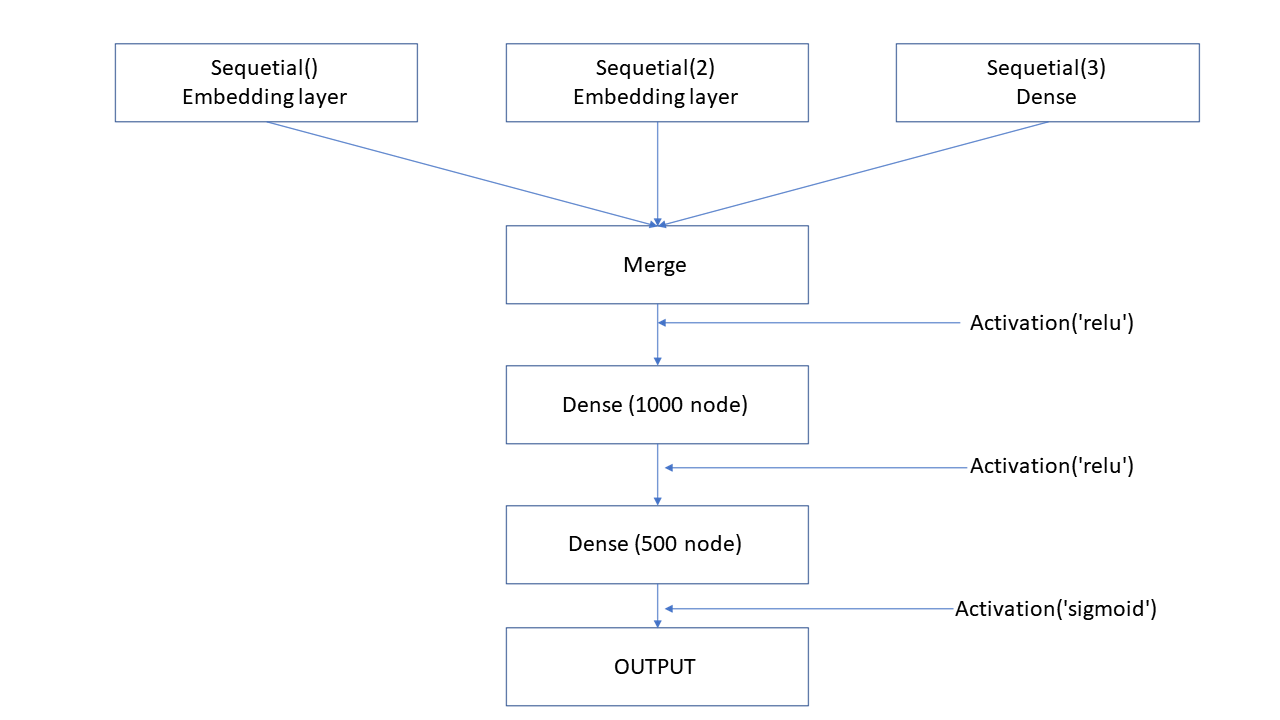

In [ ]:
#@title Model
class Model(object):
    def __init__(self, train_ratio):
        self.train_ratio = train_ratio
        self.__load_data()

    def __load_data(self):
        self.submit_data = pd.read_pickle('/content/data/pickle/test.pickle')
        self.train_data = pd.read_pickle('/content/data/pickle/train.pickle')
        self.train_data = self.train_data[self.train_data['Sales'] != 0]
        non_train_features = ['Date', 'Sales', 'Customers', 'Open']
        self.train_features = list(set(self.train_data.columns) - set(non_train_features))
        self.max_log_y = np.max(np.log(self.train_data['Sales'].values))
        if self.train_ratio < 1:
          self.X, self.X_val, self.y, self.y_val = train_test_split(self.train_data[self.train_features],
                                                                    self._val_for_fit(self.train_data['Sales'].values),
                                                                    test_size=1-self.train_ratio,
                                                                    shuffle=True,
                                                                    random_state=42)
        else:
          self.X, self.y = self.train_data[self.train_features], self._val_for_fit(self.train_data['Sales'].values)

class NN_with_EntityEmbedding(Model):
    def __init__(self, train_ratio=0.95, name="model"):
        super().__init__(train_ratio)
        self.best_weights_path = '/content/data/models/' + name + '.h5'
        self.nb_epoch = 20
        self.batch_size = 256
        self.checkpointer = ModelCheckpoint(filepath=self.best_weights_path,
                                            verbose=1,
                                            save_best_only=True)
        self.__build_model()

    def __build_model(self):
        models = []
        for feature in self.train_features:
          feature_dtype = self.X[feature].dtype
          num_unique_values = int(self.X[feature].nunique())
          model = Sequential()
          if feature_dtype == 'int64' and num_unique_values > 2:
            embed_size = int(min(num_unique_values / 3, 50))
            model.add(Embedding(num_unique_values,
                                embed_size,
                                input_length=1,
                                name=feature+'_Embedding'))
            model.add(Reshape(target_shape=(embed_size,)))
          else:
            model.add(Dense(1, input_dim=1, name=feature+'_Dense'))
          models.append(model)

        self.model = Sequential()
        self.model.add(Merge(models, mode='concat'))
        self.model.add(Dropout(0.02))
        self.model.add(Dense(1000, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(500, init='uniform'))
        self.model.add(Activation('relu'))
        self.model.add(Dense(1))
        self.model.add(Activation('sigmoid'))
        self.model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

    def _val_for_fit(self, val):
        val = np.log(val) / self.max_log_y
        return val

    def _val_for_pred(self, val):
        return np.exp(val * self.max_log_y)

    def convert_to_list(self, data):
      return [data[feature].values.reshape(-1,1) for feature in self.train_features]

    def fit(self):
        if self.train_ratio < 1:
            self.model.fit(self.convert_to_list(self.X), 
                           self.y,
                           validation_data=(self.convert_to_list(self.X_val), 
                                            self.y_val),
                           nb_epoch=self.nb_epoch, 
                           batch_size=self.batch_size,
                           callbacks=[self.checkpointer])
            self.model.load_weights(self.best_weights_path)
        else:
            self.model.fit(self.convert_to_list(self.X), 
                           self._val_for_fit(self.y),
                           nb_epoch=self.nb_epoch,
                           batch_size=128)
            self.save_weights(self.best_weights_path)

    def guess(self):
        return self._val_for_pred(self.model.predict(self.convert_to_list(self.submit_data)))

In [ ]:
# fit
train_ratio = 1
num_networks = 10
models = []
for i in range(num_networks):
  name = "model" + str(i)
  print(f'Fitting {name}...')
  model = NN_with_EntityEmbedding(train_ratio=train_ratio, name=name)
  try:
    model_weights_path = '/content/data/models/' + name + '.h5'
    model.model.load_weights(model_weights_path)
  except:
    model.fit()
  models.append(model)

Fitting model0...
Epoch 1/20
 80896/844338 [=>............................] - ETA: 205s - loss: 0.0223 - acc: 0.0000e+00

In [ ]:
# predict
sum_preds = None
for i in range(num_networks):
  model = models[i]
  preds = model.guess()
  if sum_preds is None: sum_preds = preds
  else: sum_preds += preds
avg_preds = (sum_preds / num_networks).astype('object')

id_column = models[0].submit_data['Id'].values.reshape(-1,1)
concat = np.concatenate([id_column, avg_preds], axis=1)
submit_df = pd.DataFrame(concat, columns=['Id','Sales']).sort_values(by=['Id']).reset_index(drop=True)
submit_df
# submit_df.to_csv('/content/submission.csv',index=False)

In [ ]:
submit_df.to_csv('/content/submission.csv',index=False)

### **5. Đánh giá kết quả**

mạng NN là `num_network = 10` và `train_ratio = 1`

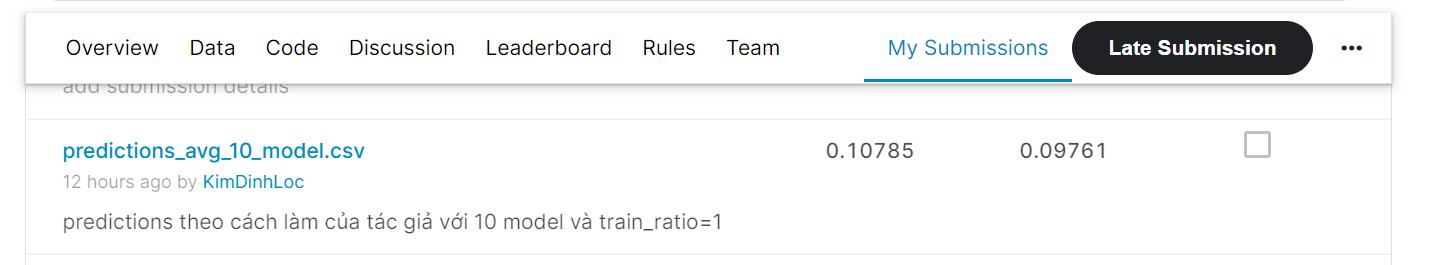

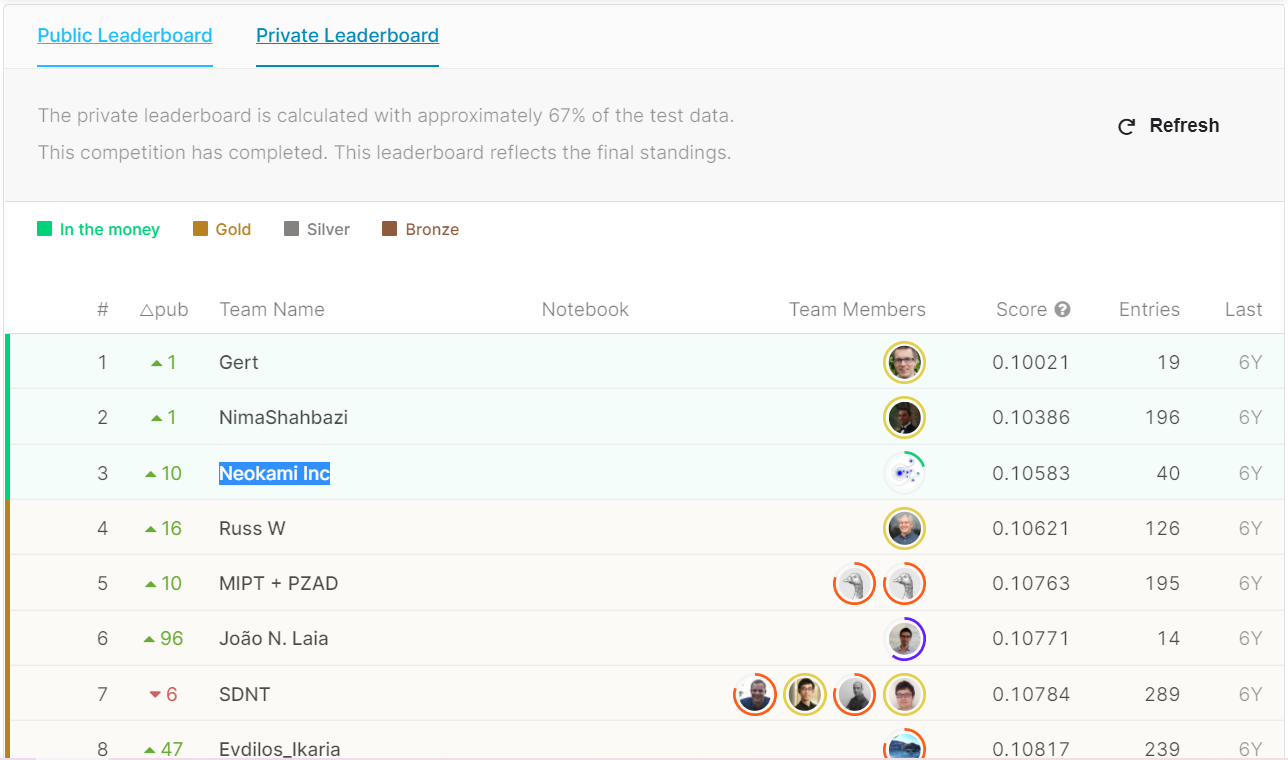

**Thay đổi 1 ít model**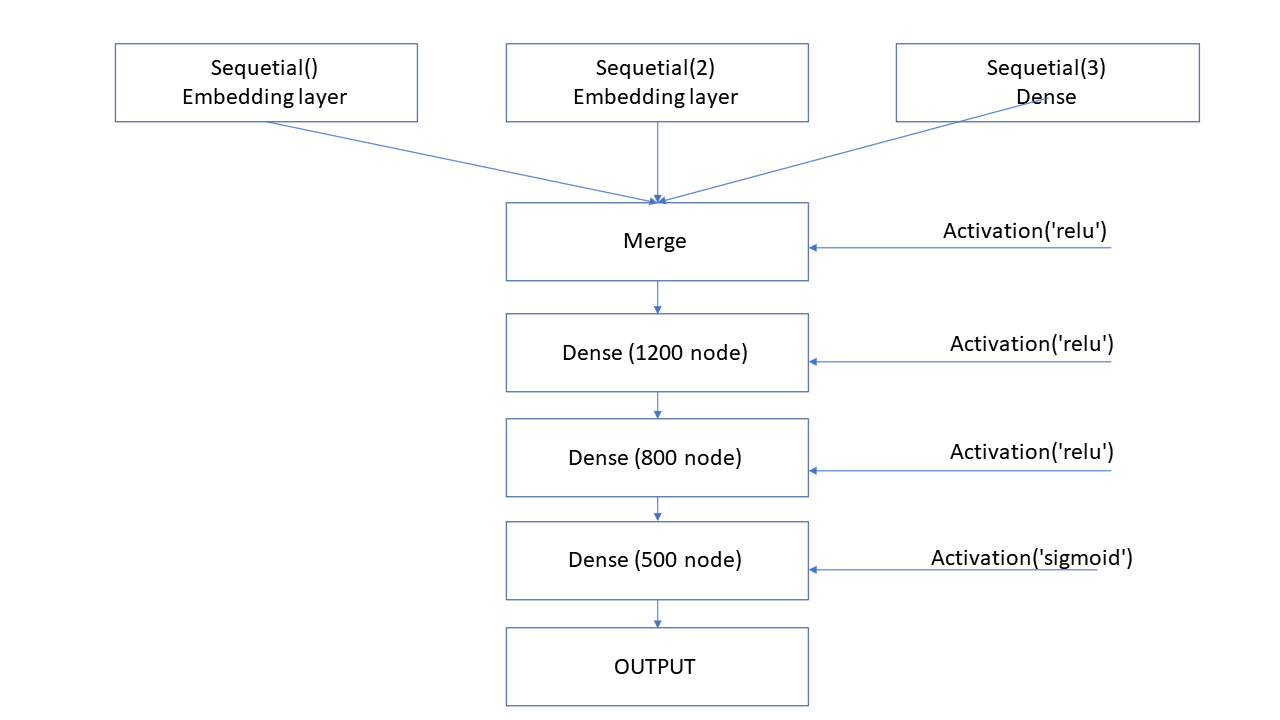

Sau đó chọn 5 model tốt nhất của tác giả, 5 model tốt nhất của model mới để submit.

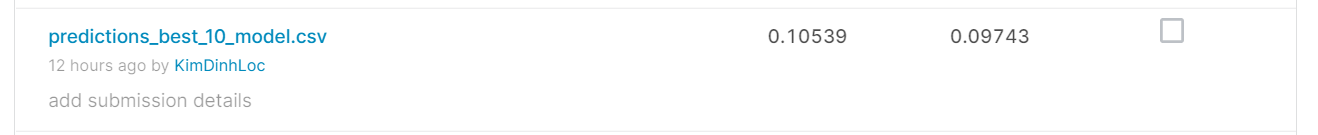

## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay.

## Tài liệu tham khảo

1. 